First of all, a few notes:
* This work is a sequel to the previous homework assignment (HW-4 ENCODE).
* It is assumed that in HW-4 you successeeded in data processing of ChIP-seq and ATAC-seq experiments. If you failed to do so or just didn't have time to complete HW-4, please contact me in Telegram, I will give data you can work with in this homework.
* Comment and describe! To give you a high grade, we need to understand that you interpreted all results correctly.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

A cat image to get you throught this homework:

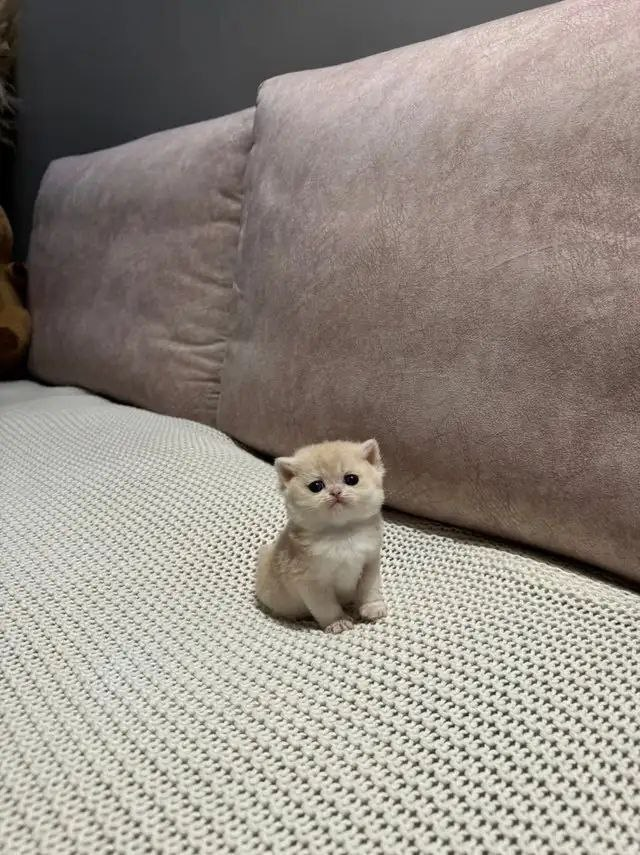

<font color=#c30>**Now you are ready.**</font>

# Introduction

## Target transcription factors

In HW-4, you were asked to choose three ChIP-seq experiments and one ATAC-seq experiment from some cell line. Please list the names of TFs and the cell line.

* Cell line:
* TF-1:
* TF-2:
* TF-3:





<font color=#c30>**[0.5]**</font> Load your data and make train/test split.

Make sure that after this section, you have the following:
* `Xtrain`/`Xtest` - table with k-mers, features for our sequences
* `Ytrain`/`Ytest` - table with 4 one-hot-encoded columns, one for each class (background + 3 TFs)

Also, some asserts for you to check if everything is fine with your dataset.

In [ ]:
# Load data here

In [ ]:
assert df['Class'].nunique() == 4, "Something is wrong with the number of your classes"
# Ignore below if you have different maximum length of k-mers
assert df.shape[1] == 1365, "Do you have 1364 columns for k-mers and 1 for class?"
assert (df.drop(['Class'], axis=1).dtypes == 'float64').sum() == 1364, "Some of k-mer columns are not float values"
assert (df['Class'].dtype == 'int64') == True, "Your class column have non-integer values"

In [ ]:
# Train/Test split here

## Model training <font color=#c30>**[5]**</font>

Time to train our fit-predict skills!

<font color=#c30>**[0.5]**</font> Select proper target metric(s). Do you want to use micro- or macro-averaging? Justify your choice.

<font color=#c30>**[1]**</font> Make sure you understand your multiclassification strategy. Briefly explain differences between One-Vs-Rest (One-Vs-All) and One-Vs-One strategies. Does every model from the list below supports multiclass classification, or do you need to wrap something into multiclass wrappers (OVR/OVO)? Check the links below for more info.

  * <font color=#c30>**[ ! ]**</font> In the context of our task, we are working with **Multiclass classification**, NOT multilabel classification! (Make sure you understand the difference)

  * <font color=#c30>**[ ! ]**</font> For the sake of simplicity, choose One-Vs-Rest strategy.

  * Which models support multiclass classification: https://scikit-learn.org/1.5/modules/multiclass.html
  * OVO wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
  * OVR wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html



Your answer:

<font color=#c30>**[3]**</font> Train and optimize hyperparameters for the following models:
  * Logistic regression
  * KNN
  * Decision tree
  * Random Forest
  * (Optional) SVM
  * (Optional) Any Gradient Boosting implementation

  * <font color=#c30>**[ ! ]**</font> Take note that algoritmhs like SVM with nonlinear kernel will take A LOT OF TIME to train. During long calculcations, Google Colab might drop your session and you will lose your progress. To counter it, either subsample your data, make smaller grid or skip the algorithm completely (just don't delete the cell with the code and it's output).



In [ ]:
# Your code....

<font color=#c30>**[0.5]**</font> Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

Your answer:

## Interpretation <font color=#c30>**[3.5]**</font>

<font color=#c30>**[0.75]**</font> Use test set to rank optimized models. Describe and interpret results.

In [ ]:
# Your code....


<font color=#c30>**[0.75]**</font> For the model type of your choice, construct and interpret ROC curves (on the same figure) and calculate ROC AUC for:
  *  each class according to One-Vs-Rest classifier scheme
  *  micro-/macro-averaged OvR

  Use this: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-all-ovr-roc-curves-together

In [ ]:
# Your code....


<font color=#c30>**[1]**</font> Write a custom function that plots ROC curve and calculates ROC AUC.

  It should take as an input:
 * Ground-truth values for the class.
 * Probabilities predicted by the model.

  Don't use sklearn in-built functions that calculate confusion matrix values and TPR/FPR.

 *Hint: use `numpy.trapz` to calculate AUC.*

  Compare with results of sklearn implementationt.
  

In [ ]:
# Your code....


<font color=#c30>**[1]**</font> Interpret features learned by each model (where applicable). Then, compare them to known TF motifs (search them online).


In [ ]:
# Your code....

# Extra points <font color=#c30>**[1.5]**</font>

In this homework, you have freedom to choose any of two tasks to earn extra points. Completing one will grant you 1.5 points. Completing both will not grant you more.


## Task 1

<font color=#c30>**[1.5]**</font>  Implement your own version of the random forest algorithm, and compare results with the sklearn version using your dataset from this homework:

* Write a brief explanation of how Random Forest works and how will you implement the algorithm in terms of python classes.
* If you don't know what a python class is, I recommend you looking at some simple explanations, like this one: https://www.w3schools.com/python/python_classes.asp
Think through:
  * What do you need to iniate an object of RF class
  * Which parameters and data should be stored in `self.` attributes of each class instance
  * What inputs and outputs are for each built-in class function

* Write a python class for your Random Forest algorithm. Include `__init__` method (class constructor that is called each time you create an object of class), `fit` method that trains RF according to input data and stores it inside the class instance, and `predict` method which will utilize trained trees to predict class labels for input data.
  * You don't have to implement your own DecisionTree, use sklearn DecisionTree implementation instead.

* Think of a way to utilize trained trees to learn feature importances. To do so, inside your class write a function that will aggregate importances from trained DecisionTrees, and store the final importances in `self.feature_importances` attribute.

* Make sure to demonstrate the result by creating an instance of your class, fitting it with train data, predicting test data, making a barplot of feature importances, and comparing everything with sklearn implementation (using classification metrics of your choice). A code snippet for this is presented below.

In [ ]:
class ExampleForest:
  def __init__(self, ...):
    # Parameters/Data structures are defined here

  def fit(self, ...):
    # Train DecisionTrees(from sklearn) here and save them inside class

  def predict(self, ...):
    # Make predictions using trained Trees and return result

    return ...

In [ ]:
# 1) Showcase your class in action by making predictions on TFs dataset
# 2) Plot feature importances stored in .feature_importances attribute of your class
# 3) Do the same with sklearn implementation of RF (same hyperparams) and compare

## Task 2

If you chose this task, then it seems you don't mind going through both HW-4 and HW-5 a second time.

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

Now it's time to do the hard testing for your trained models! Find another tissue/cell line where we have ATAC-seq and the same set of ChIP-seq experiments available.

Then you need to do the following:

<font color=#c30>**[0.15]**</font>  Download ATAC-seq peaks, extract sequences and predict regions that each TF will bind.

<font color=#c30>**[1]**</font>  Download ChIP-seq peaks, intersect with the ATAC-seq and compare them to the ML predictions. Next, calculate standard classification metrics (per-class and then macro averaged): $F_1$, precision, recall, accuracy. Drop regions thar overlap between multiple ChIP-seq experiments (like you did for the training).

<font color=#c30>**[0.35]**</font>  Which model was the best in this scenario? Do we have any other criteria to rank models except for performance? What model would you use for real studies? Why?

In [ ]:
# Your code....